<a href="https://colab.research.google.com/github/Nelson-Muteti/Hypothesis-Testing/blob/main/HypothesisIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [59]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read / Verify Data

In [60]:
#reading the data
url = '/content/autolib_daily_events_postal_code.csv'
df = pd.read_csv(url)
url1 = '/content/columns_explanation.xlsx'
glossary = pd.read_excel(url1)

In [61]:
#checking the data
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [62]:
#get the glossary
glossary.head()

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend


In [63]:
#more data checking
df.shape

(16085, 13)

In [64]:
#understand column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [65]:
#get numerical and descriptive stats about data
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


## Data Cleaning

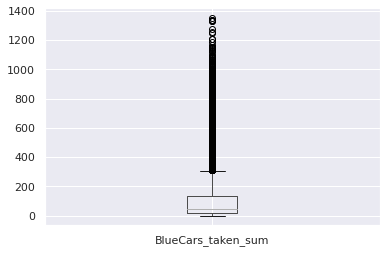

In [66]:
#now for some data cleaning
#Check for outliers in Numerical data
df.boxplot(column='BlueCars_taken_sum')
#so many outliers here..may skew our data and mess our model

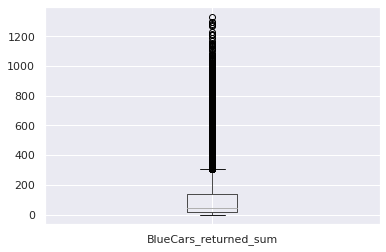

In [67]:
#check for outliers in other columns
df.boxplot(column='BlueCars_returned_sum')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


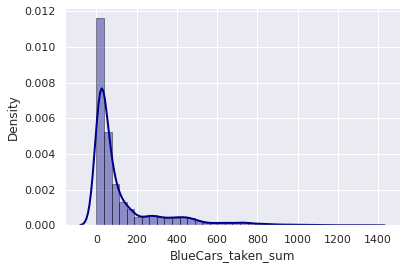

In [68]:
#a density plot correctly shows the skewness of this data
##It seems that the column has Positive Skewness therefore  the tail on the right side of the distribution is longer .
#shows a positive skewness due to many outliers
sns.distplot(df['BlueCars_taken_sum'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [69]:
#now let me actually check the number of outliers in individual columns
#I create a function that helps do this
outliers=[]

def detect_outlier(df):
    
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

len(detect_outlier(df['BlueCars_taken_sum']))
#468 outliers in this column
#if removed, this will not affect our data or model negatively

468

In [70]:
#check number of outliers in other columns
outliers=[]

def detect_outlier(df):
    
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

len(detect_outlier(df['BlueCars_returned_sum']))

460

In [71]:
outliers=[]

def detect_outlier(df):
    
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

len(detect_outlier(df['dayOfWeek']))

0

In [72]:
outliers=[]

def detect_outlier(df):
    
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

len(detect_outlier(df['Utilib_14_taken_sum']))

419

In [73]:
outliers=[]

def detect_outlier(df):
    
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

len(detect_outlier(df['Utilib_14_returned_sum']))

412

In [74]:
#now,removing the outliers and anomalies in dataset
#I have to get the Interquartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
newdf = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(newdf.shape)
print(df.shape)
#most of the data would have probably led to terrible models due to presence of anomalies and outliers


(9783, 13)
(16085, 13)


In [75]:
newdf.shape

(9783, 13)

In [76]:
#Now lets turn to missing data
newdf.isnull().sum()
#No missing data

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

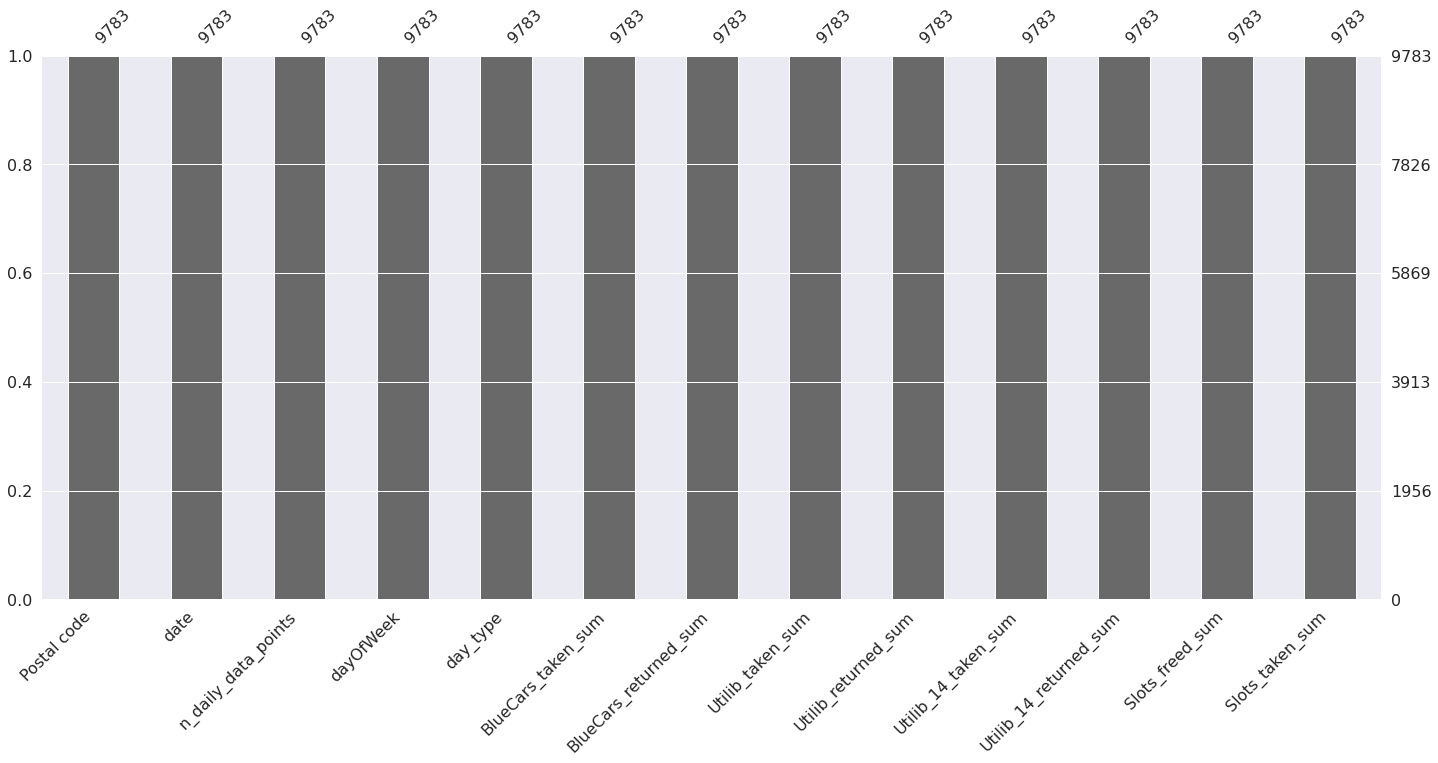

In [77]:
#but just to visualize our non-null columns we use missingno
import missingno as msno
%matplotlib inline
msno.bar(newdf)
#there are no NA values in data

In [78]:
#more data cleaning
newdf.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,0,0,1,1,4,2


In [79]:
#ensure date is in a better dateTime format
newdf['date'] = pd.to_datetime(newdf['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
newdf.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

In [81]:
#correct column names
newdf.rename(columns = {"n_daily_data_points": "datapoints", 
                     "day_type":"daytype","BlueCars_taken_sum":"BlueCarstakensum","BlueCars_returned_sum":'BlueCarsreturnedsum'}, 
                                 inplace = True) 
newdf.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['Postal code', 'date', 'datapoints', 'dayOfWeek', 'daytype',
       'BlueCarstakensum', 'BlueCarsreturnedsum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [82]:
newdf.head(2)

,Postal code,date,datapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,2018-01-01,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,2018-01-02,1438,1,weekday,10,10,0,0,0,0,0,0


In [83]:
#now check and drop any duplicate columns
newdf.drop_duplicates(keep=False,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
newdf['days'] = newdf['dayOfWeek']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
newdf.head(2)

,Postal code,date,datapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,days
3899,91330,2018-01-01,1440,0,weekday,19,9,0,0,0,0,4,2,0
3900,91330,2018-01-02,1438,1,weekday,10,10,0,0,0,0,0,0,1


In [86]:
newdf['dayOfWeek'].value_counts()

6    1564
0    1525
1    1520
5    1399
2    1359
4    1283
3    1133
Name: dayOfWeek, dtype: int64

In [87]:
newdf['days'] = newdf['days'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
#impute some column values
#create a new column with day names for better visualisation 
newdf['days'].replace(['0', '1','2','3','4','5','6'], ['Mon', 'Tue','Wed','Thur','Fri','Sat','Sun'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [89]:
#arrange data in ascending order of dates
newdf = newdf.sort_values(by = 'date', ascending = True)
newdf.head()
#so this data was recorded between January 1 2018
#and June 6th 2018

,Postal code,date,datapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,days
3899,91330,2018-01-01,1440,0,weekday,19,9,0,0,0,0,4,2,Mon
13746,94140,2018-01-01,1440,0,weekday,51,45,9,8,1,3,0,0,Mon
13590,94130,2018-01-01,1440,0,weekday,42,45,0,1,2,2,0,0,Mon
13434,94120,2018-01-01,1440,0,weekday,55,46,0,0,6,7,0,0,Mon
5301,92150,2018-01-01,1440,0,weekday,104,122,2,2,19,21,0,0,Mon


## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Sun     1564
Mon     1525
Tue     1520
Sat     1399
Wed     1359
Fri     1283
Thur    1133
Name: days, dtype: int64
 
 


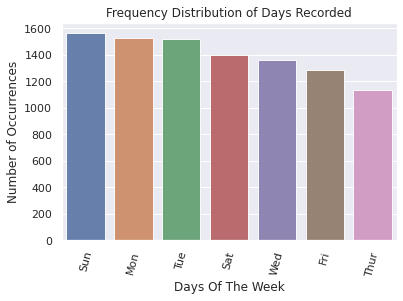

<Figure size 432x288 with 0 Axes>

In [90]:
#Now for some Univariate EDAs
#A frequency distribution of Days of the week recorded in dataset
day_count = newdf['days'].value_counts()
print(day_count)
print(' ')
print(' ')
sns.set(style="darkgrid")
sns.barplot(day_count.index, day_count.values, alpha=0.9)
plt.title('Frequency Distribution of Days Recorded')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Days Of The Week', fontsize=12)
plt.xticks(rotation = 75)
plt.show()
plt.savefig('Day Counts')

94130    130
92160    130
91400    130
94450    130
94410    130
        ... 
93260    101
92800     82
93390     72
92130     65
92100      4
Name: Postal code, Length: 79, dtype: int64
 
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


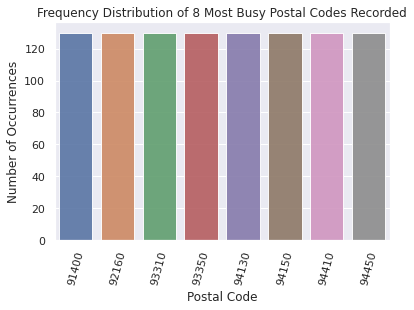

<Figure size 432x288 with 0 Axes>

In [91]:
#check and visualise the postal codes with highest frequency of activity
postal_count = newdf['Postal code'].value_counts()
print(postal_count)
post = postal_count.head(8)
#so there are 79 unique postal codes in the data
#The postal code with highest frequecies are shown
print(' ')
print(' ')
sns.set(style="darkgrid")
sns.barplot(post.index, post.values, alpha=0.9)
plt.title('Frequency Distribution of 8 Most Busy Postal Codes Recorded')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Postal Code', fontsize=12)
plt.xticks(rotation = 75)
plt.show()
plt.savefig('Postals')

weekday    6820
weekend    2963
Name: daytype, dtype: int64
 
 


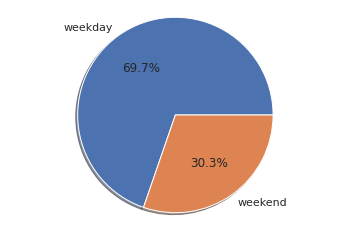

In [92]:
#Between weekdays and Weekends, which times were busy / had high frequency distributions
week_times = newdf['daytype'].value_counts()
print(week_times)
print(' ')
print(' ')
labels = newdf['daytype'].astype('category').cat.categories.tolist()
counts = newdf['daytype'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) 
ax1.axis('equal')
plt.show()
#weekdays seem to have had more frequency recorded
#almost 70% of data was recorded on weekdays.

In [93]:
# Finding the min and max number of bluecars taken in a day
max_blue = newdf['BlueCarstakensum'].max()
min_blue = newdf['BlueCarstakensum'].min()
print('Maximum Blue Cars Taken is ',max_blue)
print('Minimum Blue Cars Taken is ',min_blue)
# Calculating the range of Blue cars taken in a day
print('Range of Blue Cars taken in a day is ',max_blue - min_blue)

Maximum Blue Cars Taken is  293
Minimum Blue Cars Taken is  0
Range of Blue Cars taken in a day is  293


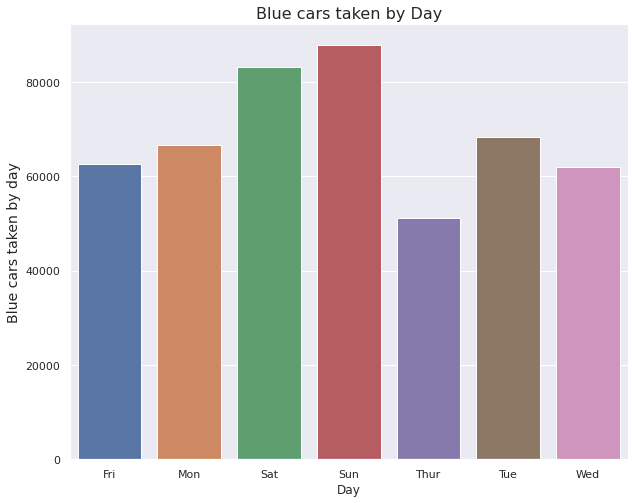

In [94]:
#Bivariate EDA
mydf = newdf.groupby('days')['BlueCarstakensum'].sum()
plt.figure(figsize= (10,8))
sns.barplot(x = mydf.index, y = mydf.values)
plt.title('Blue cars taken by Day', fontsize = 16)
plt.ylabel('Blue cars taken by day', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.show()


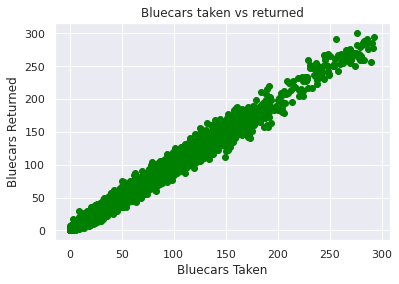

In [95]:
#scatter plot to check relation between Numerical values in data
plt.scatter(newdf['BlueCarstakensum'],newdf['BlueCarsreturnedsum'],color = 'green')
plt.title('Bluecars taken vs returned')
plt.xlabel('Bluecars Taken')
plt.ylabel('Bluecars Returned')
plt.show()
#seems there is a high correlation between bluecars taken and returned in postal codes


In [96]:
#find correlation between numerical 
#It seems that there is almost no correlation between the age of respondents and household size
coeff = newdf['BlueCarsreturnedsum'].corr(newdf['BlueCarstakensum'])
coeff
#this shows a very high postive correlation between bluecars taken and those returned in postal code
#this shows that cars taken were returned in the same postal code picked

0.9920411815140748

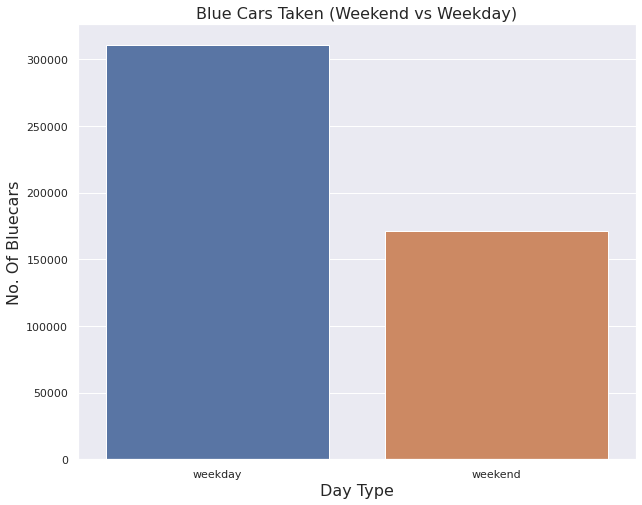

In [97]:
#when were bluecars taken (weekend vs weekday)
mydf = newdf.groupby('daytype')['BlueCarstakensum'].sum()
plt.figure(figsize= (10,8))
sns.barplot(x = mydf.index, y = mydf.values)
plt.title('Blue Cars Taken (Weekend vs Weekday)', fontsize = 16)
plt.ylabel('No. Of Bluecars', fontsize=16)
plt.xlabel('Day Type', fontsize=16)
plt.show()

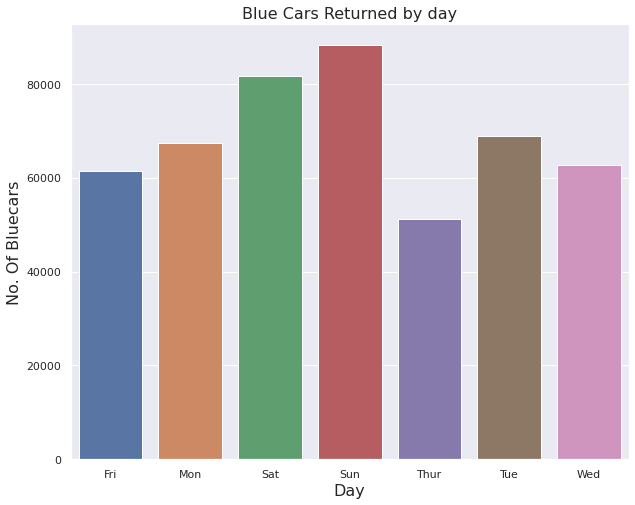

In [98]:
#when were bluecars taken (weekend vs weekday)
mydf = newdf.groupby('days')['BlueCarsreturnedsum'].sum()
plt.figure(figsize= (10,8))
sns.barplot(x = mydf.index, y = mydf.values)
plt.title('Blue Cars Returned by day', fontsize = 16)
plt.ylabel('No. Of Bluecars', fontsize=16)
plt.xlabel('Day', fontsize=16)
plt.show()

## Problem Statement
A Sales director at Bluecar Auto claims  that Bluecars are taken higher on average on Sundays as compared to Mondays.
This, he claims, is because on Sundays, more people are free to hire a car as compared to a busy workday like Monday.

I am supposed to state hypotheses on this claim and try to test whether actually more Bluecars are taken on average on Sundays than Mondays. 

The results will help the Sales and Marketing Dept. improve facilities aimed at ensuring more Bluecars are at better conditions are made available on Sundays.

In [99]:
data = newdf[(newdf['days'] == 'Mon')]
data['BlueCarstakensum'].describe()

count    1525.000000
mean       43.665574
std        41.976148
min         0.000000
25%        14.000000
50%        30.000000
75%        58.000000
max       281.000000
Name: BlueCarstakensum, dtype: float64

## Step 1: Specify the Null Hypothesis
The null hypothesis (H0) is a statement of no effect, relationship, or difference between the average of Blue Cars taken on Sunday and Monday. 

Null Hypothesis : The average of Bluecars taken on Sunday is same to those taken on Monday.Any differences are as a result of Chance.

H(0) : m = 43.665  

the Population Standard Deviation is also known, 41.9761

## Step 2: Specify the Alternative Hypothesis
The alternative hypothesis (H1) is the statement that there is an effect or difference between Average number of Bluecars taken on Monday and on Sunday.
For us, we are taking a right tailed test where we say that there is a higher average number of Bluecars taken on Sunday than on Monday.

Alternative Hypothesis : Average Number of Blue Cars taken on Sunday is higher than thoe taken on Monday and the higher number  is not by chance.

H(1) : m > 43.665

## Step 3: Set the Significance Level (alpha)
Now that we have formulated our hypothesis, we state the significance level. For this case, we set it at 0.05.

alpha = 0.05

This means that there is a 5% chance that I will accept the alternative hypothesis when my null hypothesis is actually true. (5 % chance of making a type 1 error )

## Data Description
Now we step back a bit to describe the data we are testing. The population (target) data is made of 9873 rows of data. 

Now, we are going to use a simple random sampling procedure inorder to ensure data points picked are random.

We are going to select a random sample of about 5% that is; 500 rows of data. This will help us make an inference about the population.

In [108]:
#first lets get data that only contains records for  Sunday
#This will be our Population
mydf = newdf[(newdf['days'] == 'Sun')]
mydf['days'].value_counts()

Sun    1564
Name: days, dtype: int64

In [101]:
mydf.shape

(1564, 14)

In [109]:
#Now, selecting a Simple Random Sample from this data will be
# Selecting the sample 
mysample = mydf.sample(n = 100, replace="False")
mysample


,Postal code,date,datapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,days
13136,94100,2018-01-14,1440,6,weekend,10,10,0,0,0,0,0,0,Sun
13819,94140,2018-03-18,1440,6,weekend,65,74,5,5,4,4,0,0,Sun
15430,94700,2018-05-20,1440,6,weekend,29,27,1,0,2,5,0,0,Sun
13989,94150,2018-04-01,1440,6,weekend,21,13,0,0,2,1,2,1,Sun
6494,92230,2018-04-15,1439,6,weekend,54,54,5,5,4,5,0,0,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7349,92300,2018-01-21,1440,6,weekend,189,207,4,5,5,4,0,0,Sun
13210,94100,2018-04-01,1440,6,weekend,8,6,0,0,0,0,0,0,Sun
9154,92410,2018-05-06,1439,6,weekend,15,13,0,0,0,0,0,0,Sun
15555,94800,2018-04-08,1440,6,weekend,114,124,1,1,8,8,0,0,Sun


## Hypothesis Testing Computation

Now, since I have the population Variance and the n > 30, I opt to use the Z- Statistic as my test statistic.

This is shown below.

Calculate the Test Statistic

In [110]:
#First get the Sample mean
mymean = mysample['BlueCarstakensum'].mean()
mymean

56.39

In [112]:
#since we have :
# population mean = 43.67 
#Population standard deviation = 41.97
z_stat = ( mymean - 43.67 ) / 41.97
z_stat
print('Test Statistic is : ',z_stat)

Test Statistic is :  0.3030736240171551


## Construct Confidence Interval

In [113]:
#get 95% confidence interval
lower = 43.67 - (z_stat * 41.97 / np.sqrt(100))
upper = 43.67 + (z_stat * 41.97 / np.sqrt(100))
print('Confidence Interval is ',lower,'<=',43.67,'<=',upper)

Confidence Interval is  42.398 <= 43.67 <= 44.942


## P-Value computation

Now get the Asscociated P- Value for the Test Statistic

In [114]:
#get p value for a one tailed test statistic
from scipy import stats
p_value = stats.norm.sf(abs(z_stat))
print('P Value is : ',p_value)

P Value is :  0.3809168771949904


Acceptance /Rejection Decision 

In [115]:
alpha =  0.05
if p_value  < alpha:
  print('Reject Null Hypothesis')
else:
  print('Fail to reject Null Hypothesis')

Fail to reject Null Hypothesis


## Hypothesis Testing Interpretation
From the comparison between the p value and the significance level above, we fail to reject the null hypothesis.

This means that we can conclude that there is no enough evidence to disprove that the average number of Bluecars taken on Monday is different from that Taken on Sunday. We therefore have no proof for the alternative and thus fail to reject the Null hypothesis.